1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [1]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time

Mounted at /content/drive


In [2]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [3]:
import pandas as pd
PATH = "/content/drive/MyDrive/week 02/heart.csv" # Path to your file

df = read_dataset(PATH)
#ToDo: Show histogram of dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [5]:
print("Quantitative columns \n")
print(df.describe())
print()
print("Qualitative and Quantitative columns \n")
print(df.describe(include=[object, float]))

Quantitative columns 

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std 

In [6]:
print("Continuous Columns") #định tính
continous_columns = df.describe().columns
print(continous_columns)

# print("Categorical Columns") #định lượng
# categorical_columns = df.describe(include=[object]).columns
# print(categorical_columns)

Continuous Columns
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

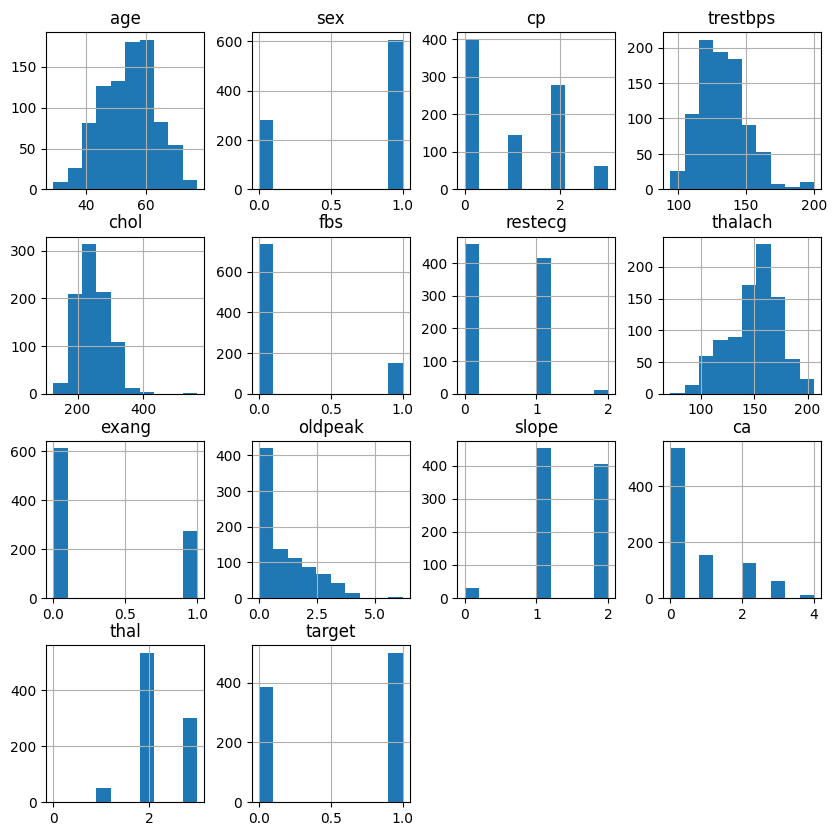

In [7]:
# Data analysis
# Todo: analyze your data here
import seaborn as sns
df.hist(column=continous_columns, figsize=(10, 10))

<Axes: xlabel='age', ylabel='Count'>

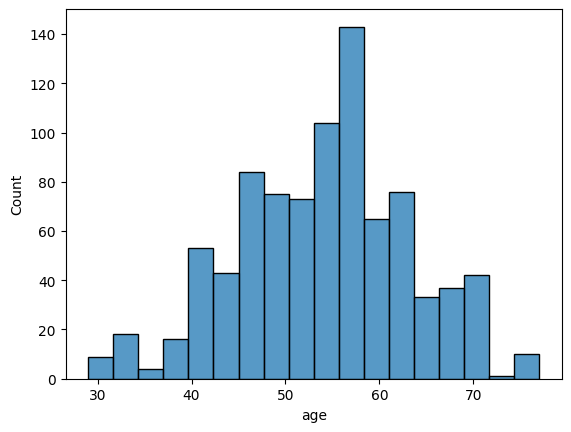

In [8]:
sns.histplot(x='age', data=df)

<Axes: xlabel='trestbps', ylabel='Count'>

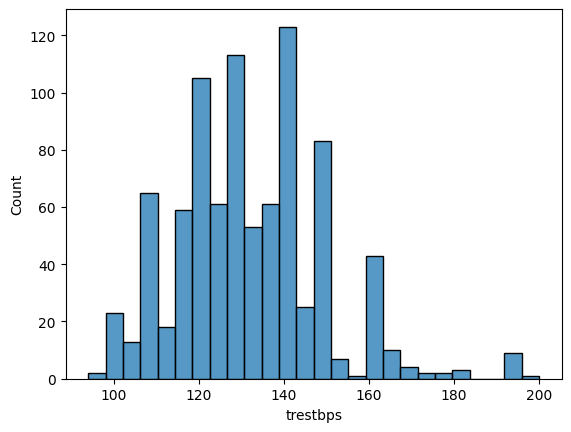

In [9]:
sns.histplot(x='trestbps', data=df)

<Axes: xlabel='chol', ylabel='Count'>

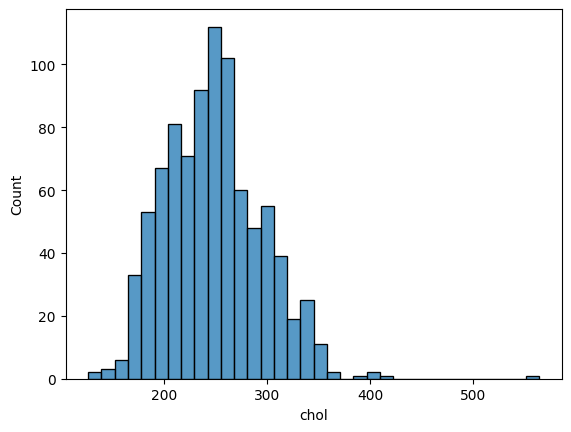

In [10]:
sns.histplot(x='chol', data=df)

<Axes: xlabel='thalach', ylabel='Count'>

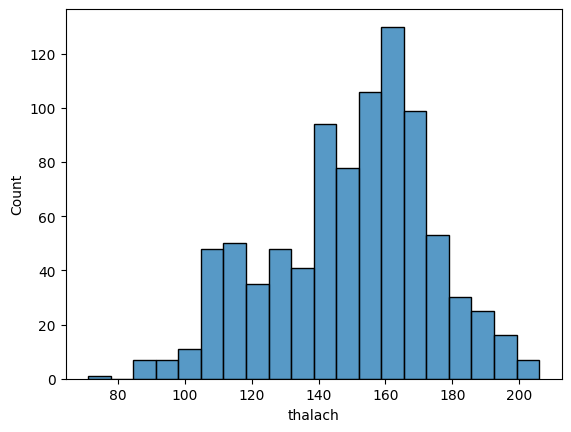

In [11]:
sns.histplot(x='thalach', data=df)

<Axes: xlabel='oldpeak', ylabel='Count'>

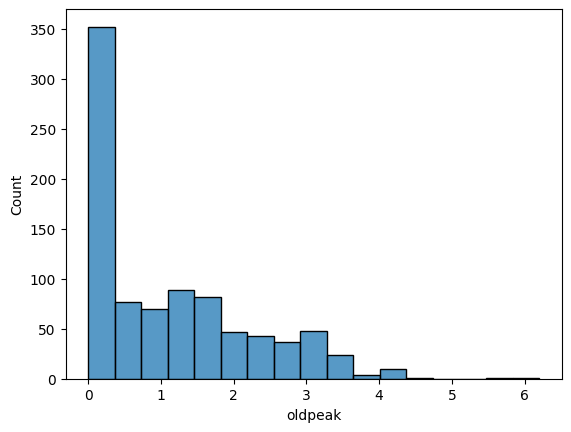

In [12]:
sns.histplot(x='oldpeak', data=df)

<Axes: xlabel='count', ylabel='sex'>

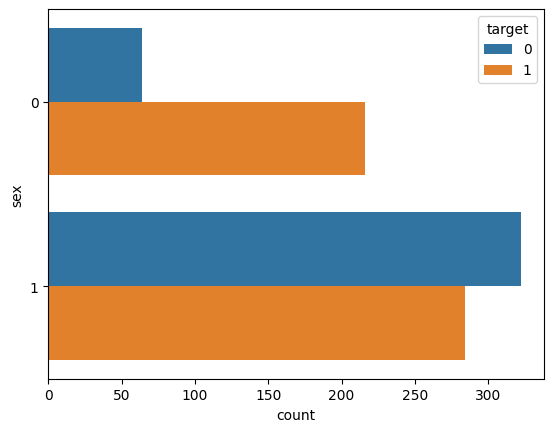

In [13]:
sns.countplot(y='sex', data=df, hue='target')

<Axes: xlabel='count', ylabel='cp'>

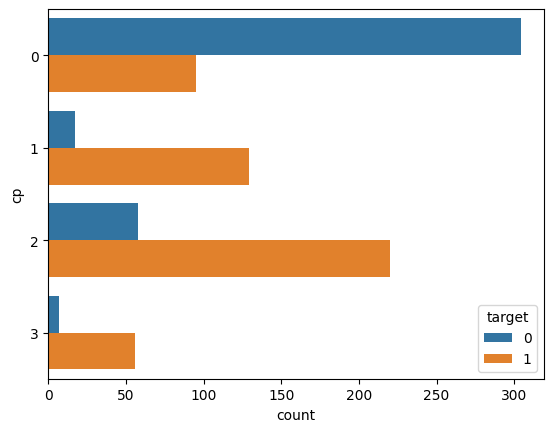

In [14]:
sns.countplot(y='cp', data=df, hue='target')

<Axes: xlabel='target', ylabel='count'>

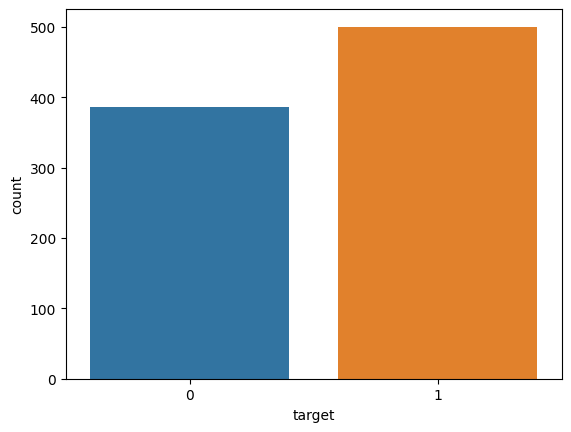

In [15]:
sns.countplot(x = 'target', data=df)

The target data is likely balanced so it is no need balancing the data

## Preprocessing

In [16]:
#check null
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#As we can see, the datasets are kinda clean and there are no missing datas.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.078459,-0.038434,0.337231,0.222152,0.187199,0.086401,-0.364585,0.125929,0.260906,-0.219664,0.271855,0.049096,-0.232576
sex,-0.078459,1.000000,0.013230,0.064870,-0.280802,0.123895,-0.241043,-0.096892,0.130696,0.152399,-0.009482,0.120516,0.212362,-0.283901
cp,-0.038434,0.013230,1.000000,0.063611,-0.157302,0.094775,0.047164,0.381308,-0.434926,-0.181597,0.142356,-0.283616,-0.253087,0.520575
trestbps,0.337231,0.064870,0.063611,1.000000,0.022509,0.157461,-0.106654,-0.082958,-0.006576,0.169383,-0.067141,0.176673,0.053659,-0.194818
chol,0.222152,-0.280802,-0.157302,0.022509,1.000000,-0.079892,0.006748,-0.050853,0.157342,0.061578,-0.001511,0.213909,0.151240,-0.093199
fbs,0.187199,0.123895,0.094775,0.157461,-0.079892,1.000000,-0.039141,-0.021372,-0.145109,-0.059736,-0.093437,0.204107,-0.113579,0.017736
restecg,0.086401,-0.241043,0.047164,-0.106654,0.006748,-0.039141,1.000000,0.088967,-0.079988,-0.050961,0.114417,-0.109777,-0.035165,0.143819
thalach,-0.364585,-0.096892,0.381308,-0.082958,-0.050853,-0.021372,0.088967,1.000000,-0.420237,-0.398322,0.463312,-0.298086,-0.128411,0.512224
exang,0.125929,0.130696,-0.434926,-0.006576,0.157342,-0.145109,-0.079988,-0.420237,1.000000,0.269824,-0.296775,0.219526,0.291320,-0.492947
oldpeak,0.260906,0.152399,-0.181597,0.169383,0.061578,-0.059736,-0.050961,-0.398322,0.269824,1.000000,-0.503280,0.287669,0.245363,-0.540943


<Axes: >

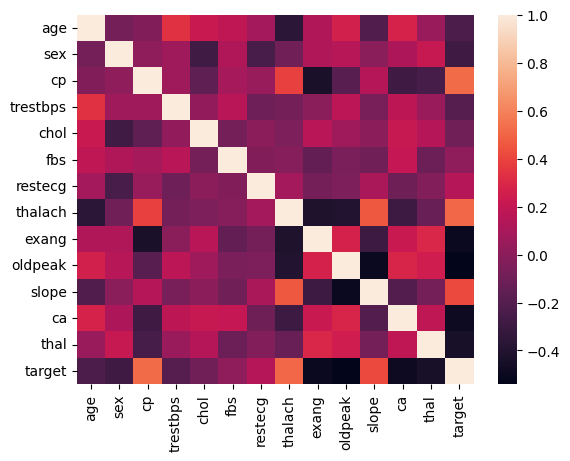

In [18]:
display(df.corr())
display(sns.heatmap(df.corr()))

Since the dataset has no missing datas, so we do not need to preprocess the dataset to make the dataset clean.

In [19]:
# def preprocessing_data(df):
#     """
#     Preprocess your data (eg. Drop null datapoints or fill missing data)
#     :param df: pandas DataFrame
#     :return: pandas DataFrame
#     """
#     # Todo: preprocess data
#     #Since the data is clean and there is no missing data, i think we may apply one hot 
#     df = 
#     return df

In [20]:
# df = preprocessing_data(df.copy())

## Feature Engineering

At feature engineering phase, I normalize the dataset with z-score, which is calculated the dataset with Gaussian distribution N(0,1)

<Axes: >

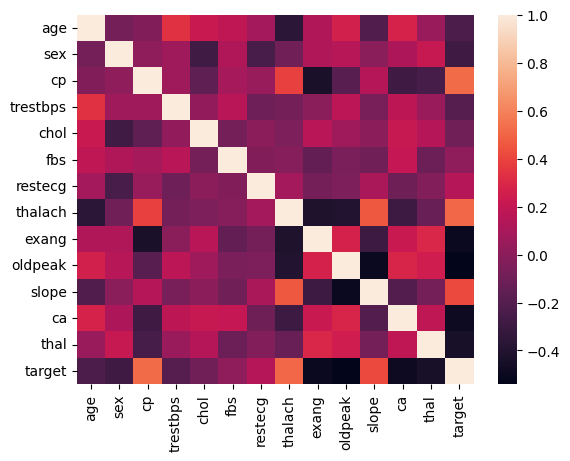

In [36]:
# Heatmap
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    normalized_data = df.copy()
    normalized_data["age"] = zscore(normalized_data["age"])
    normalized_data["trestbps"] = zscore(normalized_data["trestbps"])
    normalized_data["chol"] = zscore(normalized_data["chol"])
    normalized_data["thalach"] = zscore(normalized_data["thalach"])
    normalized_data["oldpeak"] = zscore(normalized_data["oldpeak"])
    return normalized_data

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [22]:
display(df.head())
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.877950,1,0,-0.721358,0.031839,0,0,-0.229720,0,-0.246927,2,0,3,0
1,1.862936,0,1,1.659875,1.155116,0,1,0.523172,0,-0.595575,2,2,2,1
2,1.862936,0,1,1.659875,1.176310,0,1,0.564999,0,-0.595575,2,2,2,1
3,1.862936,0,1,1.659875,1.197504,0,1,0.606826,0,-0.595575,2,2,2,1
4,1.862936,0,1,1.659875,1.218698,0,1,0.648654,0,-0.595575,2,2,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,8.860000e+02,886.000000,886.000000,8.860000e+02,8.860000e+02,886.000000,886.000000,8.860000e+02,886.000000,8.860000e+02,886.000000,886.000000,886.000000,886.000000
mean,2.405901e-16,0.683973,1.005643,-1.603934e-16,1.162852e-16,0.168172,0.495485,-3.528655e-16,0.310384,-1.283147e-16,1.424379,0.714447,2.278781,0.564334
std,1.000565e+00,0.465186,1.024542,1.000565e+00,1.000565e+00,0.374230,0.526669,1.000565e+00,0.462912,1.000565e+00,0.556861,1.028825,0.572576,0.496124
min,-2.741752e+00,0.000000,0.000000,-2.269159e+00,-2.575013e+00,0.000000,0.000000,-3.283114e+00,0.000000,-9.442239e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.683141e-01,0.000000,0.000000,-7.213576e-01,-7.523363e-01,0.000000,0.000000,-6.898202e-01,0.000000,-9.442239e-01,1.000000,0.000000,2.000000,0.000000
50%,-8.661940e-04,1.000000,1.000000,-1.260494e-01,-5.293696e-02,0.000000,0.000000,1.467261e-01,0.000000,-2.469266e-01,1.000000,0.000000,2.000000,1.000000
75%,6.569463e-01,1.000000,2.000000,4.692587e-01,5.616867e-01,0.000000,1.000000,6.904811e-01,1.000000,6.246949e-01,2.000000,1.000000,3.000000,1.000000
max,2.520748e+00,1.000000,3.000000,4.041108e+00,6.707923e+00,1.000000,2.000000,2.363574e+00,1.000000,4.459830e+00,2.000000,4.000000,3.000000,1.000000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [24]:
#choose column to apply to train set and test set
cols = df.columns.tolist()
cols.remove('target')
cols.remove('cp')
cols.remove('sex')
cols.remove('fbs')
cols.remove('restecg')
cols.remove('exang')
cols.remove('slope')
cols.remove('ca')
cols.remove('thal')

feature = df[cols]
target = df['target']

In [25]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df[cols] # Todo: Select features
    y = df['target'] # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [26]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [27]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# trainX = scaler.fit_transform(trainX)
# testX = scaler.transform(testX)

# display(pd.DataFrame(trainX))

## Build SK-learn model

In [28]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = LogisticRegression(fit_intercept=True, random_state=RANDOM_STATE)
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred) )
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
MAE = []
# Compare on training dataset
pred = model.predict(trainX)
print("Mean absolute Error on train set: ", mean_absolute_error(y_pred=pred, y_true=trainY)) #Todo: output your error)
MAE.append(mean_absolute_error(y_pred=pred, y_true=trainY))
pred = model.predict(testX)
print("Mean absolute Error on test set: ", mean_absolute_error(y_pred=pred, y_true=testY)) #Todo: output your error)
MAE.append(MAE.append(mean_absolute_error(y_pred=pred, y_true=testY)))

Mean absolute Error on train set:  0.18870967741935485
Mean absolute Error on test set:  0.23308270676691728


In [29]:
#Cross validation
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
score = cross_validate(model, X, y, scoring="precision_macro", cv=5,return_estimator=True)
sorted(score.keys())

print(score)

{'fit_time': array([0.00590229, 0.00454092, 0.00460982, 0.00663877, 0.00489044]), 'score_time': array([0.00306773, 0.0028882 , 0.00342131, 0.00295138, 0.00269222]), 'estimator': [LogisticRegression(random_state=101), LogisticRegression(random_state=101), LogisticRegression(random_state=101), LogisticRegression(random_state=101), LogisticRegression(random_state=101)], 'test_score': array([0.8452381 , 0.78804776, 0.77583528, 0.7537594 , 0.72760989])}


In [30]:
#Apply another solver and penalty
def build_model_with_solver(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    # Todo: Input your scaler and logistic model into pipeline
    modelLR= LogisticRegression(solver='liblinear', penalty='l1')
    # Todo: fit your model with X, y
    modelLR.fit(X,y)
    return modelLR

In [31]:
modelLR = build_model_with_solver(trainX, trainY)
# Compare on training dataset
pred = modelLR.predict(trainX)
print("Mean absolute Error on train set: ", mean_absolute_error(y_pred=pred, y_true=trainY)) #Todo: output your error)
pred = modelLR.predict(testX)
print("Mean absolute Error on test set: ", mean_absolute_error(y_pred=pred, y_true=testY)) #Todo: output your error)

Mean absolute Error on train set:  0.19193548387096773
Mean absolute Error on test set:  0.23308270676691728


In [32]:
print('accuracy on train set with no penalty and solver: ',model.score(trainX, trainY))
print('accuracy on test set with no penalty and solver: ', model.score(testX, testY))

accuracy on train set with no penalty and solver:  0.8112903225806452
accuracy on test set with no penalty and solver:  0.7669172932330827


In [33]:
print('accuracy on train set with penalty and solver: ',modelLR.score(trainX, trainY))
print('accuracy on test set with penalty and solver: ', modelLR.score(testX, testY))

accuracy on train set with penalty and solver:  0.8080645161290323
accuracy on test set with penalty and solver:  0.7669172932330827


In [34]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    print('accuracy on train set: ',model.score(trainX, trainY))
    print('accuracy on test set', model.score(testX, testY))
    print('mean absolute error on train set and test set: ', MAE)
    print('cross validation: ', score)
    main_metric = calculate_performance(y_true=trainY, y_pred=model.predict(trainX))
    print('main metric is recall_score and score is: ', main_metric)
    #return main_metric


In [35]:
get_conclusion()

accuracy on train set:  0.8112903225806452
accuracy on test set 0.7669172932330827
mean absolute error on train set and test set:  [0.18870967741935485, 0.23308270676691728, None]
cross validation:  {'fit_time': array([0.00590229, 0.00454092, 0.00460982, 0.00663877, 0.00489044]), 'score_time': array([0.00306773, 0.0028882 , 0.00342131, 0.00295138, 0.00269222]), 'estimator': [LogisticRegression(random_state=101), LogisticRegression(random_state=101), LogisticRegression(random_state=101), LogisticRegression(random_state=101), LogisticRegression(random_state=101)], 'test_score': array([0.8452381 , 0.78804776, 0.77583528, 0.7537594 , 0.72760989])}
precision 0.8091397849462365
recall 0.8674351585014409
accuracy 0.8112903225806452
F1 0.8372739916550765
main metric is recall_score and score is:  0.8372739916550765


I chose the recall score to be the main metric, because it has the best accuracy of all the metrics,  

And I chose the solver 'liblinear' and the penalty 'l1', since in the document on scikit-learn.org the 'liblinear' solver is suitable for the small dataset like this, and it gives a litle more precision, and the liblinear can apply 'l1' and 'l2' penalty, and it gives the same precision.